# Business Understanding
Tujuan dari project ini adalah meningkatkan kinerja penjualan perusahaan, dalam hal penentuan periode penjualan pemberian promo.</br>

### Deskripsi Permasalahan
Didapatkannya laporan mengenai ketidaktepatan promo discount yang dijalankan secara kurang efisien, dari segi periode (timing).</br>

### Pertanyaan Bisnis
Langkah yang saya ajukan adalah menjawab pertanyaan berikut:
1. Apakah Superstore mengadakan promo discount saat tingkat penjualan sedang sangat tinggi?
2. Jika iya, apakah promo tersebut menagkibatkan kerugian pada bisnis?

### Requirement
1. Jadwal Penyelesaian project: 2024-02-05 sampai 2024-02-11</br>
2. Asumsi Data:
    1. Data perlu dilakukan cleaning
    2. Missing value pada data dapat di hiraukan</br>

### Hasil yang Diharapkan
Dengan selesai nya projek ini, diharapkan aktifitas promo discount akan lebih efisien dalam pemilihan periode (timing).

# Data Understanding
Untuk menjawab pertanyaan bisnis, data Superstore yang dibutuhkan adalah:
1. Jumlah transaksi
    1. Jumlah transaksi unique
    2. Jumlah transaksi pada periode tertentu
    3. Jumlah transaksi yang menggunakan discount
    4. Jumlah transaksi yang tidak menggunakan discount
2. Discount
    1. Rata-rata discount
    2. Rata-rata discount pada periode tertentu
3. Profit
    1. Profit total
    2. Profit total yang menggunakan discount
    3. Profit total yang tidak menggunakan discount
    4. Profit rata-rata
    5. Profit rata-rata yang menggunakan discount
    6. Profit rata-rata yang tidak menggunakan discount
    7. Profit pada periode tertentu

## Data Perparation
Untuk memastikan data siap digunakan, berikut langkah yang saya ajukan untuk dilakukan:
1. import library dan data dari url
    1. pengecekan awal data dengan ```data_source.head()```
2. pengecekan tipe data dengan ```display(pd.DataFrame.info(data_source))```
3. pengecekan missing value dengan ```data_source.isnull().sum()```
4. pengecekan duplicate data ```data_source.duplicated()```
5. data siap digunakan

In [1]:
# import library dan data

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

data_url = 'https://github.com/zuuwee-1/data-urls/raw/main/SuperStore.xlsx'
data_superstore = pd.read_excel(data_url)
df = data_superstore

# display(data_superstore)
data_superstore.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub_Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [2]:
# pengecekan awal

# menampilkan tipe data dari tiap kolom
# display(pd.DataFrame.info(df)) # bisa disingkat menjadi df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9994 non-null   object        
 1   Customer_ID    9994 non-null   object        
 2   Postal_Code    9994 non-null   int64         
 3   Product_ID     9994 non-null   object        
 4   Sales          9994 non-null   float64       
 5   Quantity       9994 non-null   int64         
 6   Discount       9994 non-null   float64       
 7   Profit         9994 non-null   float64       
 8   Category       9994 non-null   object        
 9   Sub_Category   9994 non-null   object        
 10  Product_Name   9994 non-null   object        
 11  Order_Date     9994 non-null   datetime64[ns]
 12  Ship_Date      9994 non-null   datetime64[ns]
 13  Ship_Mode      9994 non-null   object        
 14  Customer_Name  9994 non-null   object        
 15  Segment        9994 n

--data cleaning 1
### Penyesuaian Tipe Data untuk kolom 'Sales', 'Quantity', 'Discount', 'Profit', etc
jika tipe dari kolom tersebut belum berupa integer/float dan masih berupa object, maka perlu terlebih dahulu diubah sesuai dengan kolom nya (Quantity int64, discount float64, etc)</br>

gunakan fungsi berikut untuk mengubah sesuai keinginan: </br>
```data_source.astype({'Collumn_Name':'new_data_type, 'Another_Collumn_Name':'another_new_data_type'})```</br>
doc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

In [3]:
# jika tipedata masih berupa object, dan ingin mengganti menjadi int64
df = df.astype({
    'Postal_Code':'object',
    'Sales':'float64',
    'Discount':'float64',
    'Profit':'float64',
    'Quantity':'int64'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9994 non-null   object        
 1   Customer_ID    9994 non-null   object        
 2   Postal_Code    9994 non-null   object        
 3   Product_ID     9994 non-null   object        
 4   Sales          9994 non-null   float64       
 5   Quantity       9994 non-null   int64         
 6   Discount       9994 non-null   float64       
 7   Profit         9994 non-null   float64       
 8   Category       9994 non-null   object        
 9   Sub_Category   9994 non-null   object        
 10  Product_Name   9994 non-null   object        
 11  Order_Date     9994 non-null   datetime64[ns]
 12  Ship_Date      9994 non-null   datetime64[ns]
 13  Ship_Mode      9994 non-null   object        
 14  Customer_Name  9994 non-null   object        
 15  Segment        9994 n

--data cleaning 2
### Penyesuaian Tipe Data untuk kolom 'Order_Date' dan 'Ship_Date'
jika tipe dari 'Order_Date' dan 'Ship_Date' belum datetime, maka perlu terlebih dahulu diubah menjadi datetime.</br>
fungsi yang bisa digunakan adalah ```Pandas.to_datetime```</br>
doc: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html</br>

langkah berikutnya adalah perubahan format date menjadi YYYY-MM-DD.</br>
dengan menggunakan ```strftime```, ubah dari format yang tidak standard menjadi YYYY-MM-DD.</br>
doc: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html

In [ ]:
# jika tipe dari 'Order_Date' belum datetime

# pengecekan pertama
# type(df['Order_Date'][0])

df['Order_Date'] = pd.to_datetime(df['Order_Date'])

type(df['Order_Date'][0])
# display(df)

In [ ]:
# jika format 'Order_Date belum YYYY-MM-DD, gunakan function ini

# Convert to datetime object (kalau cell diatas tidak dijalankan)
# df['Order_Date'] = pd.to_datetime(formatted_date_data['Order_Date'], format = '%d/%m/%Y')
# notes: 'format =' isi sesuai data sebelum format

# Convert ke format "yyyy-mm-dd"
# df['Order_Date'] = df['Order_Date'].dt.strftime('%Y-%m-%d')

# Tampilkan hasilnya
# display(df)

--data cleaning 3
### Handle Missing Data & Data Cleaning
untuk mengetahui apakah data source kita memiliki missing data, gunakan fungsi ```data_source.isnull().sum()```</br>
jika semua 0, maka dapat dikonfirmasi tidak ada missing data.</br>
doc: https://pandas.pydata.org/docs/reference/api/pandas.isnull.html


jika ada 1 atau lebih, maka perlu dilakukan data cleaning.</br>
asumsi Superstore tidak ingin ada missing data, dan semua missing data dapat dihapus sesuai persetujuan, kita bisa melakukan data cleaning dengan fungsi ```data_source.dropna``` untuk menghapus data yang mempunyai missing value.</br>
doc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [4]:
# pengecekan missing data, dengan menampilkan jumlah data dari tiap kolom yang isnull
df.isnull().sum()

Order_ID         0
Customer_ID      0
Postal_Code      0
Product_ID       0
Sales            0
Quantity         0
Discount         0
Profit           0
Category         0
Sub_Category     0
Product_Name     0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Region           0
dtype: int64

In [ ]:
# cell ini hanya digunakan jika ada missing data
# menghapus missing data

# pengecekan pertama
print(df.shape)
# display(df.isnull().sum())

# menggunakan dropna untuk menghapus data yang mempunyai missing value
data_dropna = df.dropna(how = 'all') # all = semua nya ada yg kosong -> hapus. any = salah satu kosong -> hapus

print(data_dropna.shape)
# print(data_dropna.isnull().sum())

--data cleaning 4
### Redundasi Data
untuk mengetahui apakah data memiliki duplicate entry,dapat digunakan fungsi ```data_source.duplicated()```, yang akan me-return boolean (True/False).</br>
contoh: 
1. ```data_source.duplicated(keep='last')```
2. ```data_source.duplicated(keep=False)```
3. ```data_source.duplicated(subset=['Collumn_Name'])```

setelah mendapatkan jawaban apakah data memiliki duplicate, dapat kita lihat count dari tiap value nya dengan ```data_source.value_counts()```
</br>

doc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html </br>
doc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [5]:
df_dupe_data = df.duplicated(keep='last')
df_dupe_data.value_counts()

False    9993
True        1
Name: count, dtype: int64

In [6]:
# pengecekan awal
display(df_dupe_data.shape)

(9994,)

In [7]:
# Karena didapat 1 value yang duplicate, maka kita perlu mengecek nya dengan:
# pd.Series(df_dupe_data).duplicated

df = df.drop_duplicates(keep = 'last')

In [8]:
#pengecekan setelah drop_duplicates
display(df.shape)

(9993, 20)

In [9]:
df_drop_dupe = df.duplicated(keep='last')
df_drop_dupe.value_counts()

False    9993
Name: count, dtype: int64

**Data cleaning 4 adalah proses data cleaning terakhir. Dari sini, data sudah bisa dianggap bersih dan siap digunakan**

## Agregasi 'Order_ID' sebagai satu record yang mencakup seluruh item
Hal ini bertujuan untuk tidak memisahkan profit per tipe item yang ada, dan menggabungkan nya menjadi satu kolom yang sudah di agregasi kolom profit dan discount nya.</br>
Dengan menggunakan ```data_source.groupby('Column_Name')``` kita dapat menyatukan transaksi yang sama.</br>
doc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html </br>

In [10]:
# Group data by Order_ID
grouped_data = df.groupby('Order_ID')

# Agregasi data
aggregated_data = grouped_data.agg({
    'Order_Date': 'first', # Dibutuhkan nanti untuk memisahkan per year per month
    'Sales': 'sum',
    'Discount': 'sum',
    'Profit': 'sum',
    'Product_Name': 'count' # Jumlah item per trx

})

# Hitung average discount dan average profit per item
aggregated_data['Avg_Discount_Per_Item'] = aggregated_data['Discount'] / aggregated_data['Product_Name']
aggregated_data['Avg_Profit_Per_Item'] = aggregated_data['Profit'] / aggregated_data['Product_Name']

# Drop unnecessary columns if needed
aggregated_data.drop(columns=['Product_Name'], inplace=True)

# Display the aggregated data
display(aggregated_data)

,Order_Date,Sales,Discount,Profit,Avg_Discount_Per_Item,Avg_Profit_Per_Item
Order_ID,,,,,,
CA-2017-100006,2017-09-07,377.970,0.0,109.6113,0.000000,109.611300
CA-2017-100090,2017-07-08,699.192,0.4,-19.0890,0.200000,-9.544500
CA-2017-100293,2017-03-14,91.056,0.2,31.8696,0.200000,31.869600
CA-2017-100328,2017-01-28,3.928,0.2,1.3257,0.200000,1.325700
CA-2017-100363,2017-04-08,21.376,0.4,7.7192,0.200000,3.859600
...,...,...,...,...,...,...
US-2020-168802,2020-11-03,18.368,0.2,5.9696,0.200000,5.969600
US-2020-169320,2020-07-23,171.430,0.0,16.6721,0.000000,8.336050
US-2020-169488,2020-09-07,56.860,0.0,26.5552,0.000000,13.277600


## Membuat kolom baru, dan mengisi sebagai 'year' dan 'month'
dengan meggunakan ```data_source['Date_Column_Name'].dt.year``` yang kemudian disimpan sebagai kolom baru ```data_superstore['year'] =```, kita dapat membuat kolom baru untuk memudahkan peng-kategorian data, dengan mengambil data dari 'Order_Date', dan meng-extract value year dan month nya.</br>
doc: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html</br>
doc: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html

In [11]:
aggregated_data['year'] = aggregated_data['Order_Date'].dt.year
aggregated_data['month'] = aggregated_data['Order_Date'].dt.month

aggregated_data.groupby(['year','month']).size() # jalankan line ini saja, untuk melihat hasil groupby nya
display(aggregated_data)

,Order_Date,Sales,Discount,Profit,Avg_Discount_Per_Item,Avg_Profit_Per_Item,year,month
Order_ID,,,,,,,,
CA-2017-100006,2017-09-07,377.970,0.0,109.6113,0.000000,109.611300,2017,9
CA-2017-100090,2017-07-08,699.192,0.4,-19.0890,0.200000,-9.544500,2017,7
CA-2017-100293,2017-03-14,91.056,0.2,31.8696,0.200000,31.869600,2017,3
CA-2017-100328,2017-01-28,3.928,0.2,1.3257,0.200000,1.325700,2017,1
CA-2017-100363,2017-04-08,21.376,0.4,7.7192,0.200000,3.859600,2017,4
...,...,...,...,...,...,...,...,...
US-2020-168802,2020-11-03,18.368,0.2,5.9696,0.200000,5.969600,2020,11
US-2020-169320,2020-07-23,171.430,0.0,16.6721,0.000000,8.336050,2020,7
US-2020-169488,2020-09-07,56.860,0.0,26.5552,0.000000,13.277600,2020,9


## Untuk melihat unique count transaction per periode, gunakan group by per year per month
doc: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html

In [12]:
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month

trx_per_periode = df.groupby(by = ['year','month'], as_index = False).agg(Unique_Transaction = ('Order_ID', 'nunique'))
display(trx_per_periode)

,year,month,Unique_Transaction
0,2017,1,32
1,2017,2,28
2,2017,3,71
3,2017,4,66
4,2017,5,69
5,2017,6,66
6,2017,7,65
7,2017,8,72
8,2017,9,130
9,2017,10,78


In [ ]:
# Create a line chart
# plt.figure(figsize=(10, 6))
# plt.plot(trx_per_periode.index, trx_per_periode['Unique_Transaction'], marker='o', color='orange', linestyle='-')
# plt.title('Unique Transactions per Period')
# plt.xlabel('Period')
# plt.ylabel('Unique Transactions')
# plt.xticks(range(len(trx_per_periode)), trx_per_periode['year'].astype(str) + '-' + trx_per_periode['month'].astype(str), rotation=45)
# plt.tight_layout()
# plt.show()

## Melakukan perhitungan kerugian profit



In [13]:
# Group data by periode (year-month) and calculate total unique transactions for transactions with and without discounts
total_unique_trx = df.groupby(['year', 'month'])['Order_ID'].nunique().reset_index()
unique_trx_withdiscount = df[df['Discount'] != 0].groupby(['year', 'month'])['Order_ID'].nunique().reset_index()
unique_trx_nodiscount = df[df['Discount'] == 0].groupby(['year', 'month'])['Order_ID'].nunique().reset_index()

# Calculate total profit for transactions with and without discounts
profit_withdiscount = df[df['Discount'] != 0].groupby(['year', 'month'])['Profit'].sum().reset_index()
profit_nodiscount = df[df['Discount'] == 0].groupby(['year', 'month'])['Profit'].sum().reset_index()

# Merge the DataFrames to include total unique transactions and profit
merged_profit = profit_withdiscount.merge(profit_nodiscount, on=['year', 'month'], suffixes=('_withdiscount', '_nodiscount'))
merged_profit = merged_profit.merge(total_unique_trx, on=['year', 'month'])
merged_profit = merged_profit.merge(unique_trx_withdiscount, on=['year', 'month'], suffixes=('_total', '_withdiscount'))
merged_profit = merged_profit.merge(unique_trx_nodiscount, on=['year', 'month'], suffixes=('_total', '_nodiscount'))

# Calculate the profit difference
merged_profit['Profit_Difference'] = merged_profit['Profit_withdiscount'] - merged_profit['Profit_nodiscount']

"""
Jika selisih profit positif, itu berarti bahwa diskon yang diberikan
pada transaksi berhasil meningkatkan keuntungan total. Dengan kata lain,
memberikan diskon telah membantu Superstore mendapatkan lebih banyak keuntungan
daripada jika tidak memberikan diskon sama sekali. Ini bisa dianggap sebagai investasi yang menguntungkan.

Namun, jika selisih profit negatif, itu menandakan bahwa penggunaan diskon
tidak menghasilkan keuntungan yang diharapkan. Dalam hal ini, diskon yang
diberikan pada transaksi tidak menghasilkan keuntungan yang cukup untuk menutupi
biaya yang dikeluarkan, termasuk diskon itu sendiri. Ini bisa dianggap
sebagai pengeluaran yang tidak efisien dan dapat menyebabkan kerugian bagi Superstore.
"""

# Determine if Superstore is losing money
merged_profit['Losing_Money'] = merged_profit['Profit_Difference'] < 0

# Rearrange columns
merged_profit = merged_profit.reindex(columns=[
    'year',
    'month',
    'Order_ID_total',
    'Order_ID_withdiscount',
    'Profit_withdiscount',
    'Order_ID',
    'Profit_nodiscount',
    'Profit_Difference',
    'Losing_Money'])

# Rename columns
merged_profit = merged_profit.rename(columns={
    'year': 'Year',
    'month': 'Month',
    'Order_ID_total': 'Total_Unq_Trx',
    'Order_ID_withdiscount': 'Unq_Trx_WithDiscount',
    'Order_ID': 'Unq_Trx_NoDiscount',
    'Profit_withdiscount': 'Profit_WithDiscount',
    'Profit_nodiscount': 'Profit_NoDiscount'})

# Display the DataFrame
display(merged_profit)


,Year,Month,Total_Unq_Trx,Unq_Trx_WithDiscount,Profit_WithDiscount,Unq_Trx_NoDiscount,Profit_NoDiscount,Profit_Difference,Losing_Money
0,2017,1,32,17,-408.5640,18,2858.7547,-3267.3187,True
1,2017,2,28,16,25.4281,13,836.8803,-811.4522,True
2,2017,3,71,48,-2379.7986,33,2878.5285,-5258.3271,True
3,2017,4,66,32,376.0022,41,3124.8918,-2748.8896,True
4,2017,5,69,41,-576.9001,37,3315.6097,-3892.5098,True
5,2017,6,66,41,925.5473,34,4050.9771,-3125.4298,True
6,2017,7,65,44,-3168.5673,32,2327.0847,-5495.6520,True
7,2017,8,72,39,870.4791,42,4447.6259,-3577.1468,True
8,2017,9,130,82,-4566.7557,63,12894.8551,-17461.6108,True
9,2017,10,78,52,457.7793,37,2990.4780,-2532.6987,True


## Menjawab Pertanyaan Bisnis
Dari perhitungan diatas, dapat disimpulkan bahwa SuperStore mengalami kerugian yang tidak menguntungkan dari penggunaan promo discount.</br>
Hal ini 

In [14]:
# Memastikan
profit_withdiscount = df[df['Discount'] != 0]['Profit'].sum()
profit_nodiscount = df[df['Discount'] == 0]['Profit'].sum()

print("Total Profit with Discounts:", profit_withdiscount)
print("Total Profit with no Discounts:", profit_nodiscount)
print("Total Profit:", profit_nodiscount - profit_withdiscount)
# print("Total Profit2:",  profit_withdiscount - profit_nodiscount)

Total Profit with Discounts: -34578.5227
Total Profit with no Discounts: 320987.6032
Total Profit: 355566.1259


## Menggunakan matplotlib untuk visualisasi data, mengenai unique transaction per periode, dan per hari

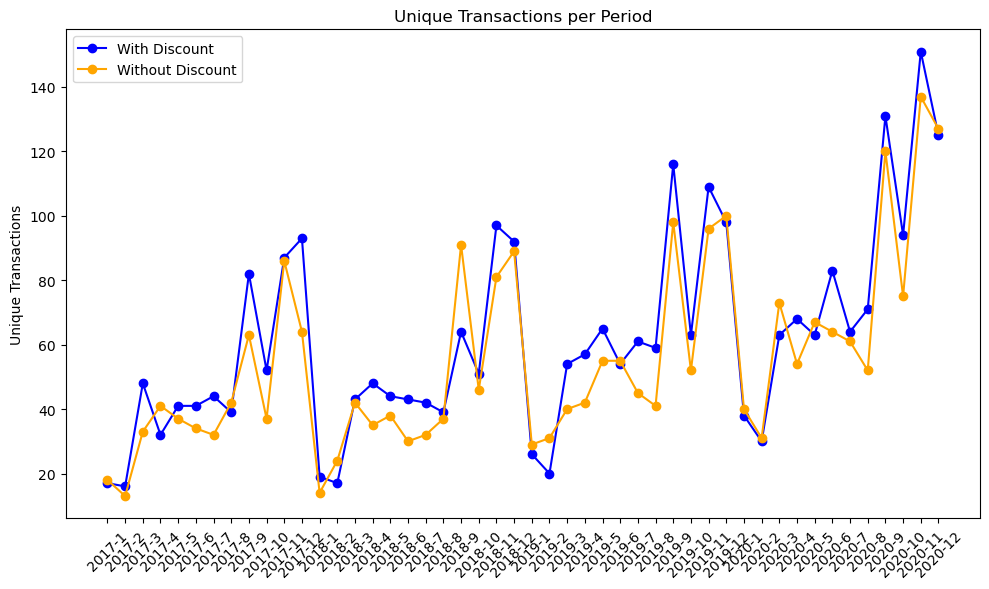

In [16]:
# Group data by periode (year-month) dan hitung unique transaction
trx_per_periode = df.groupby([df['year'], df['month']])['Order_ID'].nunique().reset_index()
trx_per_periode.columns = ['Year', 'Month', 'Unique_Transactions']

# Memisahkan transaksi yang memiliki diskon dan yang tidak
trx_withdiscount = df[df['Discount'] != 0].groupby([df['year'], df['month']])['Order_ID'].nunique().reset_index()
trx_withdiscount.columns = ['Year', 'Month', 'Unique_Transactions']

trx_nodiscount = df[df['Discount'] == 0].groupby([df['year'], df['month']])['Order_ID'].nunique().reset_index()
trx_nodiscount.columns = ['Year', 'Month', 'Unique_Transactions']

# Plot the data
plt.figure(figsize=(10, 6))

# Plot line for transactions with discount
plt.plot(trx_per_periode['Year'].astype(str) + '-' + trx_per_periode['Month'].astype(str), trx_withdiscount['Unique_Transactions'], marker='o', color='blue', label='With Discount')

# Plot line for transactions without discount
plt.plot(trx_per_periode['Year'].astype(str) + '-' + trx_per_periode['Month'].astype(str), trx_nodiscount['Unique_Transactions'], marker='o', color='orange', label='Without Discount')

# Set x-axis labels
plt.xticks(rotation=45)

# Set y-axis label
plt.ylabel('Unique Transactions')

# Set chart title
plt.title('Unique Transactions per Period')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


Dari figur tersebut, dapat dilihat bahwa peningkatan jumlah unique transaction terjadi di penghujung tiap tahunnya.</br>
untuk memudahkan visualisasi, bisa dibuat figur yang sudah di sort dari total unique transaction nya:

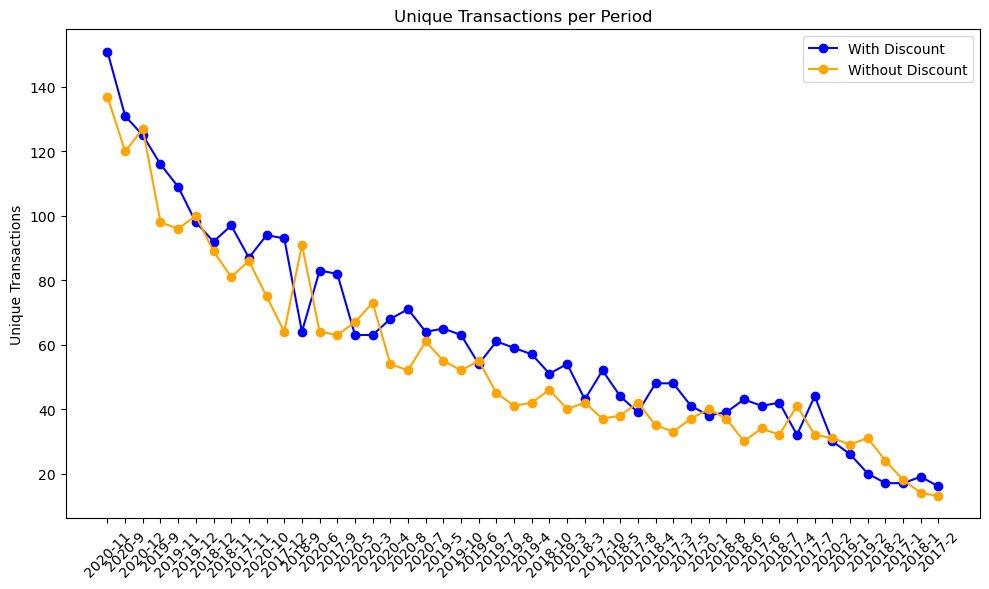

In [17]:
import matplotlib.pyplot as plt

# Group data by period (year-month) and calculate total unique transactions
trx_per_periode2 = df.groupby([df['year'], df['month']])['Order_ID'].nunique().reset_index()
trx_per_periode2.columns = ['Year', 'Month', 'Unique_Transactions']

# Separate transactions with and without discount
trx_withdiscount2 = df[df['Discount'] != 0].groupby([df['year'], df['month']])['Order_ID'].nunique().reset_index()
trx_withdiscount2.columns = ['Year', 'Month', 'Unique_Transactions']

trx_nodiscount2 = df[df['Discount'] == 0].groupby([df['year'], df['month']])['Order_ID'].nunique().reset_index()
trx_nodiscount2.columns = ['Year', 'Month', 'Unique_Transactions']

# Sort the data by the highest number of unique transactions
trx_per_periode_sorted2 = trx_per_periode2.sort_values(by='Unique_Transactions', ascending=False)

# Sort trx_withdiscount2 and trx_nodiscount2 by the order of trx_per_periode_sorted2
trx_withdiscount2_sorted = trx_withdiscount2.reindex(trx_per_periode_sorted2.index)
trx_nodiscount2_sorted = trx_nodiscount2.reindex(trx_per_periode_sorted2.index)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot line for transactions with discount
plt.plot(trx_per_periode_sorted2['Year'].astype(str) + '-' + trx_per_periode_sorted2['Month'].astype(str), trx_withdiscount2_sorted['Unique_Transactions'], marker='o', color='blue', label='With Discount')

# Plot line for transactions without discount
plt.plot(trx_per_periode_sorted2['Year'].astype(str) + '-' + trx_per_periode_sorted2['Month'].astype(str), trx_nodiscount2_sorted['Unique_Transactions'], marker='o', color='orange', label='Without Discount')

# Set x-axis labels
plt.xticks(rotation=45)

# Set y-axis label
plt.ylabel('Unique Transactions')

# Set chart title
plt.title('Unique Transactions per Period')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


Seperti poin yang diatas, top 10 total unique transaction terjadi di antara bulan 9 sampai 12 (September - Desember).</br>
Dari insight ini, kita bisa <b>menggunakan Regression di Machine Learning, untuk membuat forecast penjualan di periode mendatang</b>

In [ ]:
# Extract hari dari kolom 'Order_Date' (0=Monday, 6=Sunday)
df['Day_of_Week'] = df['Order_Date'].dt.dayofweek

# Group data by 'day of week' dan hitung unique transaction dengan ['Order_ID'].nunique()
daily_transactions = df.groupby('Day_of_Week')['Order_ID'].nunique()
daily_transactions_withdiscount = df[df['Discount'] != 0].groupby('Day_of_Week')['Order_ID'].nunique()
daily_transactions_nodiscount = df[df['Discount'] == 0].groupby('Day_of_Week')['Order_ID'].nunique()

# Menaruh label (0=Monday, 6=Sunday)
days_of_week = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(days_of_week, daily_transactions, color='skyblue')
plt.title('Unique Transactions by Day of Week')
# plt.xlabel('Day of Week')
plt.ylabel('Unique Transactions')

# line chart nodiscount
plt.plot(
    days_of_week,
    daily_transactions_nodiscount,
    marker='o',
    color='orange',
    label='Transactions with Discount = 0',
    linestyle='-')

# line chart withdiscount
plt.plot(
    days_of_week,
    daily_transactions_withdiscount,
    marker='o',
    color='red',
    label='Transactions with Discount != 0',
    linestyle='-')

plt.tight_layout()
plt.show()